In [1]:
import numpy as np  # библиотека для матриц и математики
import pandas as pd  # библиотека для работы с табличками
from scipy import stats  # модуль для работы со статистикой
import scipy

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sb

import math

plt.style.use('ggplot')  # стиль графиков

%matplotlib inline

# 8.1

In [2]:
xls = pd.ExcelFile(r'./../table.xls')
df = xls.parse(1)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
0,1061,Alaska Pacific University,AK,IIB,454,382,362,382,N,567,485,471,487,N,6,11,9,4,32,N
1,1063,Univ.Alaska-Fairbanks,AK,I,686,560,432,508,Y,914,753,572,677,Y,74,125,118,40,404,Y
2,1065,Univ.Alaska-Southeast,AK,IIA,533,494,329,415,N,716,663,442,559,Y,9,26,20,9,70,N
3,11462,Univ.Alaska-Anchorage,AK,IIA,612,507,414,498,Y,825,681,557,670,Y,115,124,101,21,392,Y
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,442,369,310,350,N,530,444,376,423,N,59,77,102,24,262,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,3825,West Virginia Inst. of Tech.,WV,IIB,408,340,297,349,N,502,419,369,431,N,54,43,29,11,137,N
1069,3827,West Virginia University,WV,I,535,431,361,439,Y,642,521,438,529,N,335,237,272,22,895,Y
1070,3830,West Virginia Wesleyan Coll.,WV,IIB,441,383,339,383,N,572,494,434,495,N,25,22,24,3,74,N
1071,3831,Wheeling Jesuit College,WV,IIB,403,348,282,315,N,486,416,348,381,N,8,20,25,12,65,N


In [4]:
X = df.A5.to_numpy()
Y = df.A8.to_numpy()

In [5]:
X

array([454, 686, 533, ..., 441, 403, 539], dtype=int64)

In [6]:
Y

array([382, 508, 415, ..., 383, 315, 445], dtype=int64)

In [11]:
X.shape

(1073,)

In [19]:
coef, p = stats.pearsonr(X, Y)
print('Pirson correlation coefficient: %.3f' % coef)
print('Pirson p-value: %.3f' % p)

coef, p = stats.spearmanr(X, Y)
print('Spearmans correlation coefficient: %.3f' % coef)
print('Spearmans p-value: %.3f' % p)

coef, p = stats.kendalltau(X, Y)
print('Kendall correlation coefficient: %.3f' % coef)
print('Kendall p-value: %.3f' % p)

Pirson correlation coefficient: 0.968
Pirson p-value: 0.000
Spearmans correlation coefficient: 0.964
Spearmans p-value: 0.000
Kendall correlation coefficient: 0.841
Kendall p-value: 0.000


In [12]:
stats.pearsonr(X, Y)


PearsonRResult(statistic=0.9676495087428427, pvalue=0.0)

In [13]:
stats.spearmanr(X, Y)


SpearmanrResult(correlation=0.964218164732936, pvalue=0.0)

In [14]:
stats.kendalltau(X, Y)


KendalltauResult(correlation=0.8405274510615323, pvalue=0.0)

In [15]:
std1 = X.std()
std2 = Y.std()
mean1 = X.mean()
mean2 = Y.mean()
n = X.shape[0]

r, _ = stats.pearsonr(X, Y)

for alpha in [0.01, 0.05, 0.1]:
    print(f'{alpha = }')
    quantile = stats.norm(loc=0, scale=1).ppf(1 - (alpha / 2))

    a = r + (r * (1 - r ** 2) / (2 * n)) - ((1 - r ** 2) / n ** (1 / 2)) * quantile
    b = r + (r * (1 - r ** 2) / (2 * n)) + ((1 - r ** 2) / n ** (1 / 2)) * quantile
    print(f'lower: {a}')
    print(f'higher: {b}')
    print()

alpha = 0.01
lower: 0.9626727297979933
higher: 0.972683692325349

alpha = 0.05
lower: 0.9638695103109725
higher: 0.9714869118123699

alpha = 0.1
lower: 0.9644818486319657
higher: 0.9708745734913766



In [122]:
# a_ranked = np.apply_along_axis(stats.rankdata, 0, np.column_stack((X, Y)))
# a_ranked

In [123]:
# rs = np.corrcoef(a_ranked, rowvar=0)
# rs

## Пирсон

In [20]:
dof = n - 2  # degrees of freedom

r, _ = stats.pearsonr(X, Y)

# rs can have elements equal to 1, so avoid zero division warnings

# clip the small negative values possibly caused by rounding
# errors before taking the square root
z = r * np.sqrt(dof / (1 - r ** 2))
f_z = stats.t(n - 2).cdf(z)
p_value = 2 * min(f_z, 1 - f_z)

z, p_value

(125.51583082232489, 0.0)

## Спирмен

In [21]:
dof = n - 2  # degrees of freedom

r, _ = stats.spearmanr(X, Y)

# rs can have elements equal to 1, so avoid zero division warnings
with np.errstate(divide='ignore'):
    # clip the small negative values possibly caused by rounding
    # errors before taking the square root
    z = r * np.sqrt((dof / (1 - r ** 2)))
    f_z = stats.t(n - 2).cdf(z)
    p_value = 2 * min(f_z, 1 - f_z)

z, p_value

(119.02655851028636, 0.0)

## Кендалл

In [22]:
r, _ = stats.kendalltau(X, Y)

z = r * np.sqrt((9 * n * (n + 1)) / (2 * (2 * n + 5)))
f_z = stats.norm(loc=0, scale=1).cdf(z)
p_value = 2 * min(f_z, 1 - f_z)

z, p_value

(41.270521349340356, 0.0)

# 8.2

In [23]:
X1 = df.A5.to_numpy()
X2 = df.A6.to_numpy()
X3 = df.A8.to_numpy()

In [24]:
X1

array([454, 686, 533, ..., 441, 403, 539], dtype=int64)

In [25]:
X2

array([382, 560, 494, ..., 383, 348, 410], dtype=int64)

In [26]:
X3

array([382, 508, 415, ..., 383, 315, 445], dtype=int64)

In [27]:
n = X.shape[0]
n

1073

In [28]:
data = {
    'X1': X1,
    'X2': X2,
    'X3': X3
}
data = pd.DataFrame(data)
data

,X1,X2,X3
0,454,382,382
1,686,560,508
2,533,494,415
3,612,507,498
4,442,369,350
...,...,...,...
1068,408,340,349
1069,535,431,439
1070,441,383,383
1071,403,348,315


In [29]:
# матрица ранговых коэффициентов корреляции по Кендаллу
# матрица значений p-value для ранговых коэффициентов корреляции по Кендаллу

sample = [X1, X2, X3]
arr_kendall = []
arr_kendall_pvalue = []

for i in range(0, 3):
    row = []
    row_p = []
    for j in range(0, 3):
        if i != j:
            t = stats.kendalltau(sample[i], sample[j])
            row.append(t[0])
            row_p.append(t[1])
        else:
            t = stats.kendalltau(sample[i], sample[j])
            row.append(t[0])
            row_p.append(0.0)
    arr_kendall.append(row)
    arr_kendall_pvalue.append(row_p)

arr_kendall_pvalue

[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

In [30]:
arr_kendall

[[0.9999999999999999, 0.8207843548296889, 0.8405274510615323],
 [0.8207843548296889, 1.0, 0.8129554569730247],
 [0.8405274510615321, 0.8129554569730247, 1.0]]

In [31]:
corr = data.corr('kendall')
corr

,X1,X2,X3
X1,1.000000,0.820784,0.840527
X2,0.820784,1.000000,0.812955
X3,0.840527,0.812955,1.000000


<AxesSubplot: >

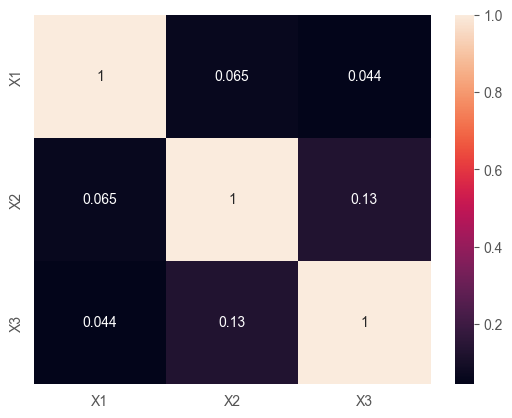

In [141]:
sb.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="rocket",
           annot=True)

In [32]:
def kend_p(r):
    z1 = r * np.sqrt((9 * n * (n + 1)) / (2 * (2 * n + 5)))
    f_z1 = stats.norm(loc=0, scale=1).cdf(z1)
    p_value1 = 2 * min(f_z1, 1 - f_z1)
    return p_value1

In [33]:
p_vs = corr.applymap(kend_p)
p_vs

,X1,X2,X3
X1,0.0,0.0,0.0
X2,0.0,0.0,0.0
X3,0.0,0.0,0.0


<AxesSubplot: >

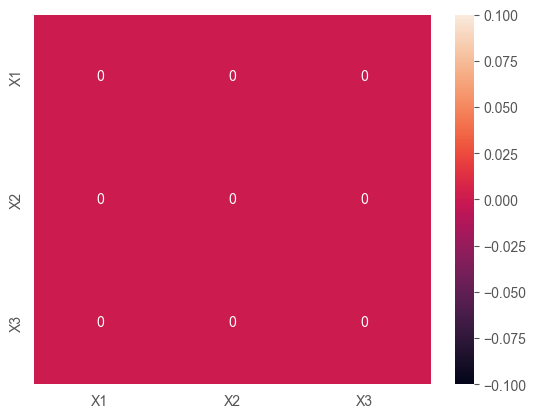

In [34]:
sb.heatmap(p_vs,
           xticklabels=p_vs.columns.values,
           yticklabels=p_vs.columns.values,
           cmap="rocket",
           annot=True)

In [35]:
stats.kendalltau(X1, X2, method='auto')

KendalltauResult(correlation=0.8207843548296889, pvalue=0.0)

AttributeError: 'numpy.ndarray' object has no attribute 'rank'

In [36]:
import warnings


def compute_w(data):
    assert isinstance(data, list), "You must pass a python list,\
        {} found".format(type(data))
    assert all(isinstance(x, list) for x in data), "You must pass a list of\
        python lists as input."  # To test
    assert all(isinstance(x[y], int) for x in data for y in range(len(x))), "You must\
        pass a list of lists of integers."  # To test

    # Number of annotators
    m = len(data[0])
    # Tests
    if not all(len(i) == m for i in data):
        raise ValueError("Items must all have the same number of annotators.\
            At least one sublist of argument 'data' has different length than\
            the first sublist.")
    if m <= 1:
        raise ValueError("Kendall's W is irrevelent for only one annotator,\
            try adding more lists to argument 'data'.")
    if m == 2:
        warnings.warn("Kendall's W is adapted to measure agreement between\
            more than two annotators. The results might not be reliable in\
            this case.", Warning)

    # Number of items
    n = len(data)
    # Tests
    if n <= 1:
        raise ValueError("Kendall's W is irrevelent for only one item,\
            try adding more sublists to argument 'data'.")

    # Sum of each item ranks
    sums = [sum(x) for x in data]
    # Mean of ranking sums
    Rbar = sum(sums) / n
    # Sum of squared deviations from the mean
    S = sum([(sums[x] - Rbar) ** 2 for x in range(n)])

    W = (12 * S) / (m ** 2 * (n ** 3 - n))

    return W

In [37]:
s1 = pd.Series(X1)
s2 = pd.Series(X2)
s3 = pd.Series(X3)

r1 = s1.rank()
r2 = s2.rank()
r3 = s3.rank()

r = [r1, r2, r3]

k = 3  #число выборок

w = 0
for i in range(0, n):
    s1 = 0
    for j in range(0, k):
        s1 += (1 / k) * r[j][i]
    w += (s1 - (n + 1) / 2) ** 2

w = (w * 12) / (n ** 3 - n)

print('Коэффициент конкордации: %.3f' % w)

#статистика критерия

z = k * (n - 1) * w
f_z = stats.chi2(n - 1).cdf(z)
p_value = 2 * min(f_z, 1 - f_z)

print("test: z = %.3f; p-value = %.3f" % (z, p_value))

Коэффициент конкордации: 0.971
test: z = 3121.937; p-value = 0.000


In [38]:
s1 = pd.Series(X1)
s2 = pd.Series(X2)
s3 = pd.Series(X3)

r1 = s1.rank()
r2 = s2.rank()
r3 = s3.rank()

r = np.concatenate([r1.to_numpy(), r2.to_numpy(), r3.to_numpy()]).reshape((3, r1.shape[0]))

k = 3  # число выборок

w = np.sum(((1 / k) * np.sum(r, axis=0) - (n + 1) / 2) ** 2)

w = (w * 12) / (n ** 3 - n)

print(f'Коэффициент конкордации: {w:.3f}')

# статистика критерия

z = k * (n - 1) * w
f_z = stats.chi2(n - 1).cdf(z)
p_value = 2 * min(f_z, 1 - f_z)

z, p_value

Коэффициент конкордации: 0.971


(3121.9374072589253, 0.0)

In [39]:
w

0.9707516813616062